In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.applications import ResNet50, VGG16
# import torch
# import torchvision
# import torchvision.transforms as transforms

In [3]:
dinosaur = pd.read_csv("data/dinosaur.csv")

dinosaur.head()

,Name,Period,Diet,Country
0,Aardonyx,Jurassic,herbivore,South Africa
1,Abelisaurus,Cretaceous,carnivore,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa
3,Abrosaurus,Jurassic,herbivore,China
4,Abydosaurus,Cretaceous,herbivore,North America


In [4]:
r = requests.get("https://dinosaur-facts-api.shultzlab.com/dinosaurs")
rr = r.json()

rr

[{'Name': 'Aardonyx',
  'Description': 'An early stage in the evolution of sauropods.'},
 {'Name': 'Abelisaurus',
  'Description': '"Abel\'s lizard" has been reconstructed from a single skull.'},
 {'Name': 'Abrictosaurus',
  'Description': 'An early relative of Heterodontosaurus.'},
 {'Name': 'Abrosaurus',
  'Description': 'A close Asian relative of Camarasaurus.'},
 {'Name': 'Abydosaurus',
  'Description': "This sauropod's intact skull was discovered in 2010."},
 {'Name': 'Acanthopholis', 'Description': "No, it's not a city in Greece."},
 {'Name': 'Achelousaurus',
  'Description': 'Might this have been a growth stage of Pachyrhinosaurus?'},
 {'Name': 'Achillobator',
  'Description': 'This fierce raptor was discovered in modern-day Mongolia.'},
 {'Name': 'Acristavus',
  'Description': 'This early hadrosaur lacked any ornamentation on its skull.'},
 {'Name': 'Acrocanthosaurus',
  'Description': 'The largest meat-eating dinosaur of the early Cretaceous period.'},
 {'Name': 'Acrotholus',


In [5]:
!tree

Folder PATH listing for volume Windows
Volume serial number is 2AF4-788F
C:.
+---.conda
�   +---conda-meta
�   +---DLLs
�   +---etc
�   +---include
�   �   +---cpython
�   �   +---internal
�   +---Lib
�   �   +---asyncio
�   �   �   +---__pycache__
�   �   +---collections
�   �   �   +---__pycache__
�   �   +---concurrent
�   �   �   +---futures
�   �   �   �   +---__pycache__
�   �   �   +---__pycache__
�   �   +---ctypes
�   �   �   +---macholib
�   �   �   �   +---__pycache__
�   �   �   +---__pycache__
�   �   +---curses
�   �   �   +---__pycache__
�   �   +---dbm
�   �   �   +---__pycache__
�   �   +---email
�   �   �   +---mime
�   �   �   �   +---__pycache__
�   �   �   +---__pycache__
�   �   +---encodings
�   �   �   +---__pycache__
�   �   +---ensurepip
�   �   �   +---_bundled
�   �   �   +---__pycache__
�   �   +---html
�   �   �   +---__pycache__
�   �   +---http
�   �   �   +---__pycache__
�   �   +---idlelib
�   �   �   +---Icons
�   �   �   +---idle_test
�   �   �   �  

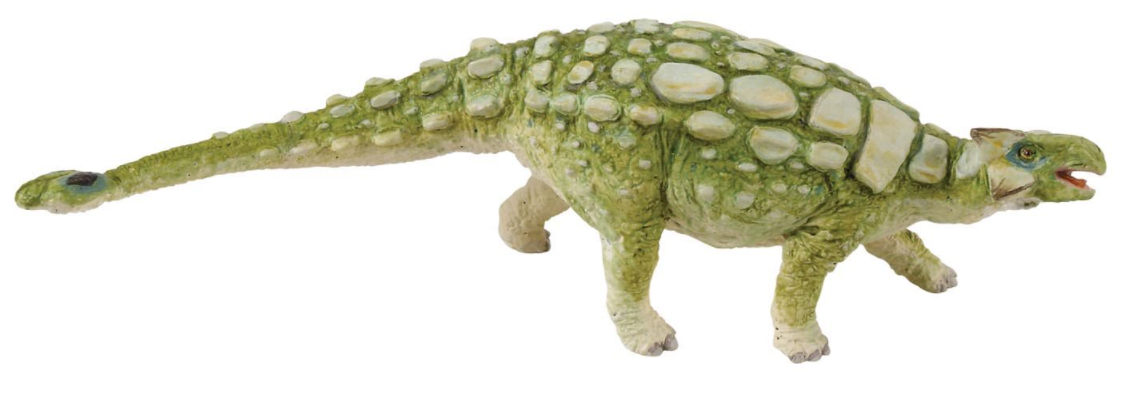

In [6]:
PIL.Image.open("data/ankylosaurus/1.png")

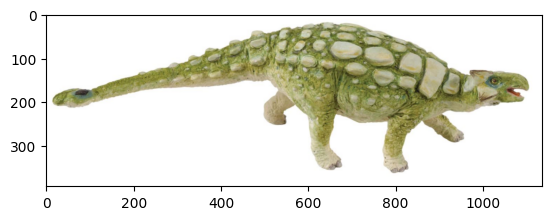

In [7]:
plt.imshow(PIL.Image.open("data/ankylosaurus/1.png"))

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(300, 500))

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(300, 500))


Found 2161 files belonging to 17 classes.
Using 1729 files for training.
Found 2161 files belonging to 17 classes.
Using 432 files for validation.


In [8]:
train_df = tf.keras.utils.image_dataset_from_directory(
    "output/train",
    image_size = (300, 500)
)

test_df = tf.keras.utils.image_dataset_from_directory(
    "output/test",
    image_size = (300, 500)
)
val_df = tf.keras.utils.image_dataset_from_directory(
    "output/val",
    image_size = (300, 500)
)

Found 160 files belonging to 5 classes.


Found 20 files belonging to 5 classes.
Found 20 files belonging to 5 classes.


In [9]:

for images, labels in train_ds.take(1):
  print(labels)

tf.Tensor([4 3 3 4 0 2 0 2 2 0 2 4 1 4 3 3 0 2 3 2 1 4 4 4 4 1 1 0 3 3 1 0], shape=(32,), dtype=int32)


In [9]:
class_names = train_ds.class_names
class_names


['Brachiosaurus',
 'Compsognathus',
 'Corythosaurus',
 'Dilophosaurus',
 'Dimorphodon',
 'Gallimimus',
 'Microceratus',
 'Pachycephalosaurus',
 'Parasaurolophus',
 'Spinosaurus',
 'Stegosaurus',
 'Velociraptor',
 'ankylosaurus',
 'brontosaurus',
 'pterodactyl',
 'trex',
 'triceratops']

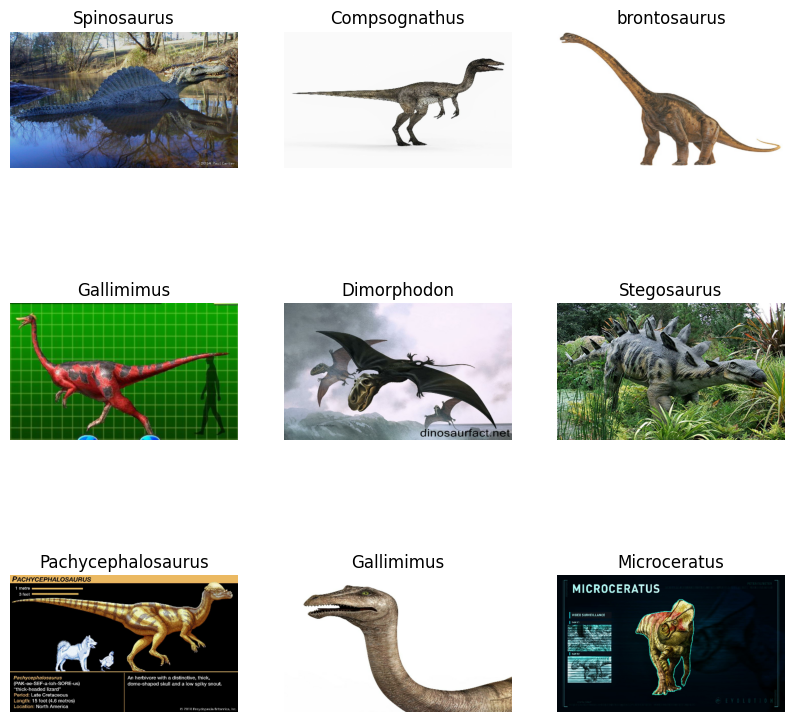

In [10]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  500,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(300, 500, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
resnet_model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape = (300, 500, 3)),
    ResNet50(include_top = True, weights = None, input_shape = (300, 500, 3), pooling = "max", classes = num_classes, classifier_activation = "softmax"),
    layers.Dense(num_classes, activation='relu')
])
resnet_model.layers[0].trainable = False
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
resnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ ?                      │    23,597,957 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,597,957 (90.02 MB)

 Trainable params: 23,544,837 (89.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
vgg_model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape = (300, 500, 3)),
    VGG16(include_top = None, weights = None, input_shape = (300, 500, 3), pooling = "max", classes = num_classes, classifier_activation = "softmax"),
    layers.Dense(num_classes, activation='relu')
])
vgg_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
vgg_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# training = vgg_model.fit(
#     train_ds,
#     validation_data = val_ds,
#     epochs = 10
# )

Epoch 1/10
 1/55 ━━━━━━━━━━━━━━━━━━━━ 1:00:18 67s/step - accuracy: 0.0000e+00 - loss: 2.8333

In [13]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(300, 500, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 57s 965ms/step - accuracy: 0.0936 - loss: 3.8048 - val_accuracy: 0.1458 - val_loss: 2.6887
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.1326 - loss: 2.6660 - val_accuracy: 0.1644 - val_loss: 2.5969
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 54s 957ms/step - accuracy: 0.1488 - loss: 2.5777 - val_accuracy: 0.1644 - val_loss: 2.5554
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.1738 - loss: 2.4645 - val_accuracy: 0.1875 - val_loss: 2.5382
Epoch 5/15
 8/55 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.2039 - loss: 2.4535   

In [22]:
history = model.fit(
  train_df,
  validation_data=val_df,
  epochs=15
)


Epoch 1/15


5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.1806 - loss: 12.9205 - val_accuracy: 0.2000 - val_loss: 2.2273
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1812 - loss: 1.9590 - val_accuracy: 0.2000 - val_loss: 2.0614
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2516 - loss: 1.6819 - val_accuracy: 0.4000 - val_loss: 1.4191
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3606 - loss: 1.4235 - val_accuracy: 0.4000 - val_loss: 1.1959
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5172 - loss: 1.1628 - val_accuracy: 0.7500 - val_loss: 0.9270
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6025 - loss: 1.0166 - val_accuracy: 0.6000 - val_loss: 0.9041
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7291 - loss: 0.8465 - val_accuracy: 0.6500 - val_loss: 0.7149
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6138 - loss: 0.8451 - val_accuracy: 0.8000 - val_loss: 0.7036
Epoch 9/15
5/5 ━━━━━━━━━

In [23]:
model.evaluate(test_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9000 - loss: 0.3150


[0.3149840831756592, 0.8999999761581421]

In [46]:

img = tf.keras.utils.load_img(
    'anktest.jpeg', target_size=(300, 500)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
This image most likely belongs to Pachycephalosaurus with a 47.80 percent confidence.


In [28]:
acc


[0.21875,
 0.23749999701976776,
 0.2562499940395355,
 0.3499999940395355,
 0.543749988079071,
 0.5874999761581421,
 0.7250000238418579,
 0.6187499761581421,
 0.6625000238418579,
 0.675000011920929,
 0.75,
 0.7875000238418579,
 0.800000011920929,
 0.793749988079071,
 0.8374999761581421]

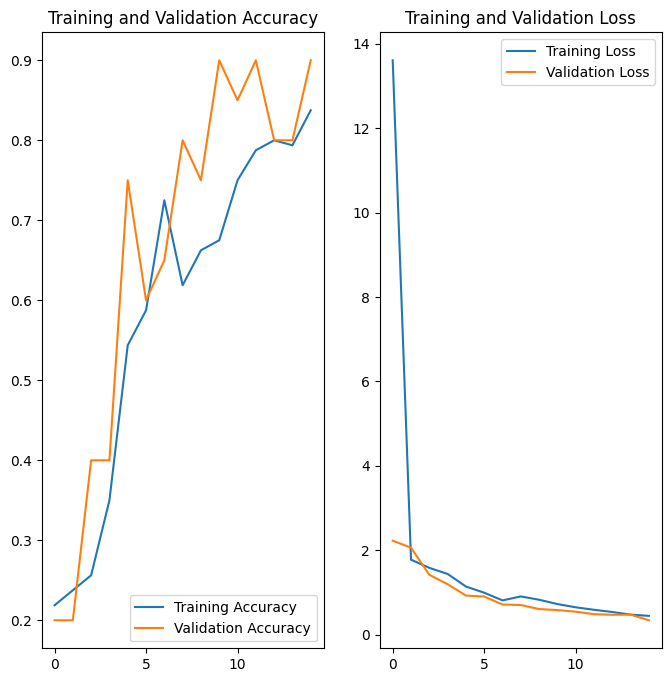

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()